# Kütüphaneleri Çağırıyoruz

In [2]:
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

# Daha Önce Ön İşlediğimiz Veriyi Çağırıyoruz ve İnceliyoruz

In [3]:
dff=pd.read_csv("amazon_cleaned_forML.csv")
dff.head()

,index,order id,status,fulfilment,style,category,size,asin,courier status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by
0,0,70508,0,1,1342,5,7,5563,2,0,0,647.62,4795,28,2477,0,0,0
1,1,13615,5,1,847,8,0,5277,1,1,0,406.00,776,23,4857,0,0,0
2,2,45301,3,0,533,8,8,675,1,1,0,329.00,5353,28,2671,0,1,1
3,3,43682,0,1,373,7,5,4638,2,0,0,753.33,6140,43,5659,0,0,0
4,4,90099,3,0,754,6,0,4351,1,1,0,574.00,1466,56,5549,0,0,1


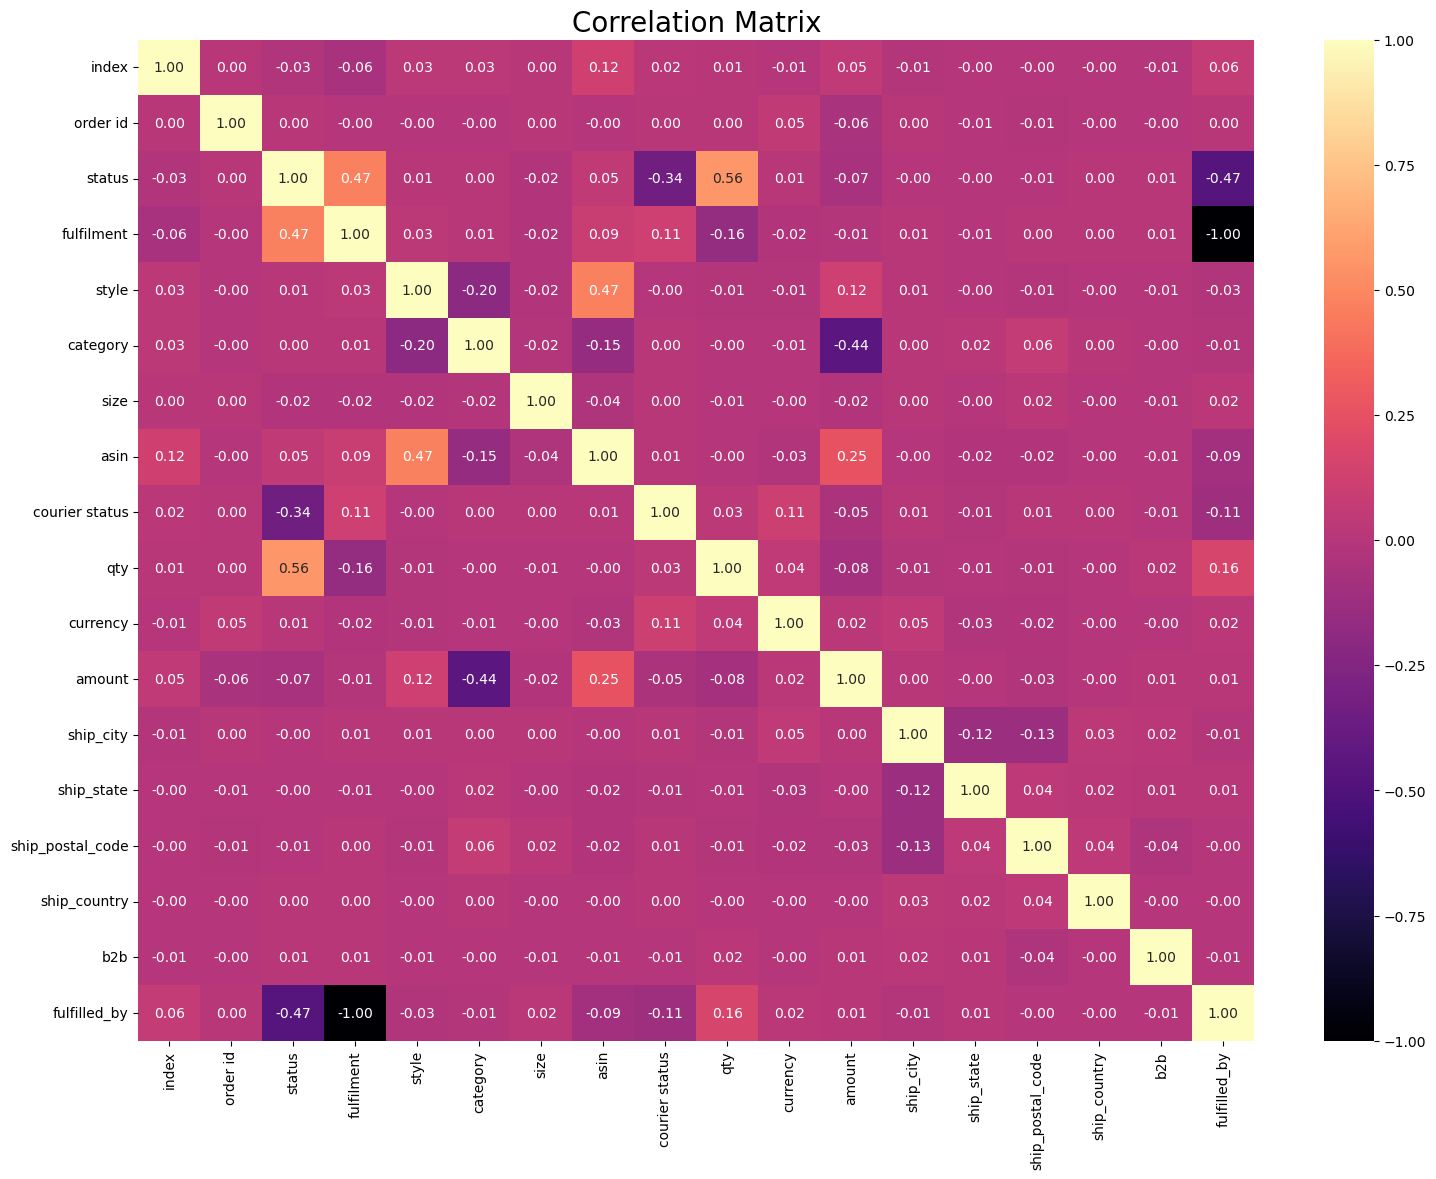

In [4]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(dff.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

*currency-salec channel
*b2b promotion ıds
*sku-style
*ship_service level-fulfillment

# Verinin Kopyasını Alıyoruz

In [5]:
df=dff.copy()

## Model,Model Seçimi ve Model Doğrulaması İçin Bazı Kütüphaneleri Çağırıyoruz

In [9]:
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

## "category" Değişkeni Üzerinde Sınıflandırma Tahminlemesi Yapacağız. Bunun İçin X ve Y Şeklinde Eğitim ve Teste Sokmak Üzere Veri Setimizi Bölüyoruz

In [7]:
X = df.drop(columns={"category"},axis=1)
y =df["category"].values.reshape(-1,1) #target

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (116077, 17)
y_train shape: (116077, 1)
X_test shape: (12898, 17)
y_test shape: (12898, 1)


## Verimizi Belli Sayısal Aralıklara Sıkıştırarak İstatiksel Olarak Daha Rahat İşlem Yapabilmeyi ve Anlaşılabilir Sonuçlar Elde Etmeyi Amaçlıyoruz. Bu Yüzden Normalizasyon Yapacağız.

In [11]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

# Knn Algoritmamızı ve Modelini Oluşturuyoruz

In [14]:
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

# Modelin K Değerine Göre Error ve Doğruluk Grafiği

Text(0.5, 1.0, 'accuracy vs K')

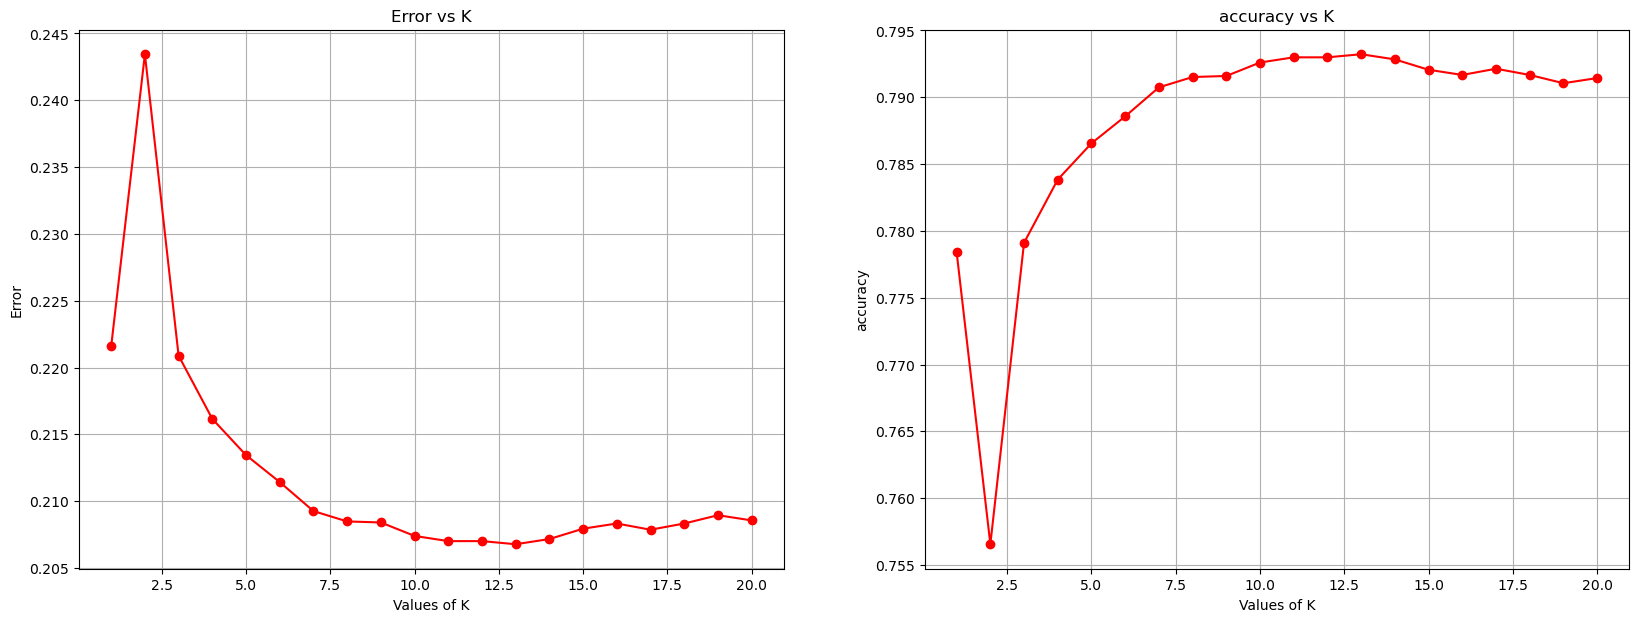

In [15]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,21),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,21),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

# Modelin Doğruluk Oranı

In [16]:
K=12
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy : 0.7929911614203753


# Diğer Sınıflandırma Algoritmalarını Deneyeceğiz

Adımlar:
1) lr=Lojistik Regresyon Atanır
2) Daha önce böldüğümüz X ve Y train verilerimizi lr ile fit edip modeli oluşturuyoruz.
3) lr_predict=X_test verisinin tahminleme sonucu
4) lr_conf_matrix=confisuion matrix doğrulama metriğinin y_test(mevcut elimizdeki test verisi) ile x'in tahmin sonuçlarının kıyaslamasının sonucu atanır.
5) lr_acc_score=doğruluk skorunu verir yukarıdaki kıyaslamaya göre.

In [18]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


confussion matrix
[[   0    0    0    0    0   11   42   33]
 [   1    0    0    0    0   22    0   24]
 [   0    0    0    0   37    4   24   55]
 [   0    0    0    0   10    0    3    2]
 [   0    0    0    0 4087   65  218  629]
 [   0    0    0    0   48  364  171  530]
 [   0    0    0    0  144   77 1192   96]
 [   1    0    0    0  556   47  266 4139]]


Accuracy of Logistic Regression: 75.8412156923554 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.00      0.00      0.00        47
           3       0.00      0.00      0.00       120
           4       0.00      0.00      0.00        15
           5       0.84      0.82      0.83      4999
           6       0.62      0.33      0.43      1113
           7       0.62      0.79      0.70      1509
           8       0.75      0.83      0.79      5009

    accuracy                           0.76     12898
   macro avg       0.35      0.35      0.

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [19]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[   0    0   86    0    0    0    0    0]
 [   1    1   45    0    0    0    0    0]
 [   0    0  120    0    0    0    0    0]
 [   0    0    0   15    0    0    0    0]
 [   8    0 1458    0 3259    0  242   32]
 [   2    0 1058    0    3    0   45    5]
 [   6    0  892    0    9    0  599    3]
 [  21    0 4574    0   42    0  312   60]]


Accuracy of Naive Bayes model: 31.43122964800744 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       1.00      0.02      0.04        47
           3       0.01      1.00      0.03       120
           4       1.00      1.00      1.00        15
           5       0.98      0.65      0.78      4999
           6       0.00      0.00      0.00      1113
           7       0.50      0.40      0.44      1509
           8       0.60      0.01      0.02      5009

    accuracy                           0.31     12898
   macro avg       0.51      0.39      0.2

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

# RFC Parametreleri

* n_estimatörs= ağaç sayısıdır
* max_depth= Ağaçların derinlik seviyesidir.Genelde 3-10 arasında değerler alır. Veri seti içerik ve boyutuna göre değişir.

In [20]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


confussion matrix
[[   0    0    0    0   44    0    0   42]
 [   0    0    0    0    5    0    0   42]
 [   0    0    0    0   94    0    0   26]
 [   0    0    0    0   15    0    0    0]
 [   0    0    0    0 4829    0    0  170]
 [   0    0    0    0  341    0   33  739]
 [   0    0    0    0  658    0  692  159]
 [   0    0    0    0  315    0  105 4589]]


Accuracy of Random Forest: 78.38424561947589 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.00      0.00      0.00        47
           3       0.00      0.00      0.00       120
           4       0.00      0.00      0.00        15
           5       0.77      0.97      0.85      4999
           6       0.00      0.00      0.00      1113
           7       0.83      0.46      0.59      1509
           8       0.80      0.92      0.85      5009

    accuracy                           0.78     12898
   macro avg       0.30      0.29      0.29   

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# exgBoost Parametreleri

1) gamma=0.6: Karar ağaçlarında bölünme yapılması için gerekli olan minimum loss azalması değerini kontrol eden bir hiperparametredir.

2) subsample=0.52: Her ağaç için kullanılacak olan örneklem oranını belirtir. Bu değer, her ağaç için kullanılacak olan veri örneklemesinin oranını ifade eder.

3) colsample_bytree=0.6: Her ağaç için kullanılacak olan özellik (sütun) örneklemesinin oranını belirtir. Yani her ağaç için kullanılacak olan özelliklerin oranıdır.

4) seed=27: Rastgele sayı üreteçleri (random number generator) için başlangıç değerini belirler. Bu, modelin tekrar çalıştırıldığında aynı sonuçları üretmesini sağlar.

5) reg_lambda=2: L2 düzenlileştirmesi (regularization) için kullanılan lambda parametresi. Bu parametre, modelin aşırı uyuma (overfitting) karşı daha dirençli olmasını sağlar.

6) booster='dart': XGBoost'un kullanacağı tip. "DART" (Dropouts meet Multiple Additive Regression Trees) yöntemi, ağaçlarda dropout kullanarak ve birden fazla ağaç ekleyerek oluşturulan bir yöntemdir.

7) colsample_bylevel=0.6: Seviye bazında özellik örneklemesi için kullanılan oranı belirtir.

8) colsample_bynode=0.5: Node bazında özellik örneklemesi için kullanılan oranı belirtir.

In [14]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[  34    0    0    0   41    0    0   11]
 [   0    0    0    0    6    1    0   40]
 [   0    0    0    0   80    0   15   25]
 [   0    0    0    1   14    0    0    0]
 [   0    0    0    0 4954    0    2   43]
 [   0    0    0    0   37  744   54  278]
 [   0    0    0    0  112   11 1275  111]
 [   0    0    0    0   78    1  106 4824]]


Accuracy of Extreme Gradient Boost: 91.73515273685842 

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        86
           1       0.00      0.00      0.00        47
           3       0.00      0.00      0.00       120
           4       1.00      0.07      0.12        15
           5       0.93      0.99      0.96      4999
           6       0.98      0.67      0.80      1113
           7       0.88      0.84      0.86      1509
           8       0.90      0.96      0.93      5009

    accuracy                           0.92     12898
   macro avg       0.71      0.49    

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


confussion matrix
[[  23    0    1    0   34    6   17    5]
 [   0    4    1    0   27   12    0    3]
 [   0    0    1    0   80   22   12    5]
 [   0    0    0    3    7    0    3    2]
 [   3    1    4    0 4507  107  139  238]
 [   1    1    1    0  207  347  227  329]
 [   2    1    1    0  172  140  958  235]
 [   2    0    2    1  223  120  281 4380]]


Accuracy of K-NeighborsClassifier: 79.26035044192898 

              precision    recall  f1-score   support

           0       0.74      0.27      0.39        86
           1       0.57      0.09      0.15        47
           3       0.09      0.01      0.02       120
           4       0.75      0.20      0.32        15
           5       0.86      0.90      0.88      4999
           6       0.46      0.31      0.37      1113
           7       0.59      0.63      0.61      1509
           8       0.84      0.87      0.86      5009

    accuracy                           0.79     12898
   macro avg       0.61      0.41     

# Karar Ağacı Parametresi

* Criterion= Bu parametre DecisionTreeClassifier sınıflandırıcısında kullanılan bölünme kriterini belirtir.
* gini: Gini impurity (Gini belirsizliği) kriterini kullanır. Gini impurity, bir düğümdeki verilerin homojenliğini ölçer. Düşük bir Gini impurity değeri, daha homojen bir düğüm anlamına gelir.
* entropy: Entropi kriterini kullanır. Entropi, bir düğümün homojenliğini ölçmek için kullanılan bir başka metriktir. Entropi, belirli bir düğümdeki sınıflar arasındaki dağılımın homojenliğini ölçer. Düşük bir entropi değeri, daha homojen bir düğüm anlamına gelir.

In [23]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[  57    0    0    0    0   29    0    0    0]
 [   2   40    0    0    0    5    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   90   29    0    1]
 [   0    0    0    0   12    0    0    3    0]
 [   0    0    8    0    0 4845  125    0   21]
 [   0    0    0    0    0   66  572   85  390]
 [   0    0    0    0    0  111   87 1193  118]
 [   1    0    0    0    0   40  173    4 4791]]


Accuracy of DecisionTreeClassifier: 89.2386416498682 

              precision    recall  f1-score   support

           0       0.95      0.66      0.78        86
           1       1.00      0.85      0.92        47
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       120
           4       1.00      0.80      0.89        15
           5       0.93      0.97      0.95      4999
           6       0.58      0.51      0.55      1113
           7       0.93      0.79      0.85      1509
     

C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Uveys\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [12]:
df.columns

Index(['index', 'order id', 'status', 'fulfilment', 'style', 'category',
       'size', 'asin', 'courier status', 'qty', 'currency', 'amount',
       'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'b2b',
       'fulfilled_by'],
      dtype='object')

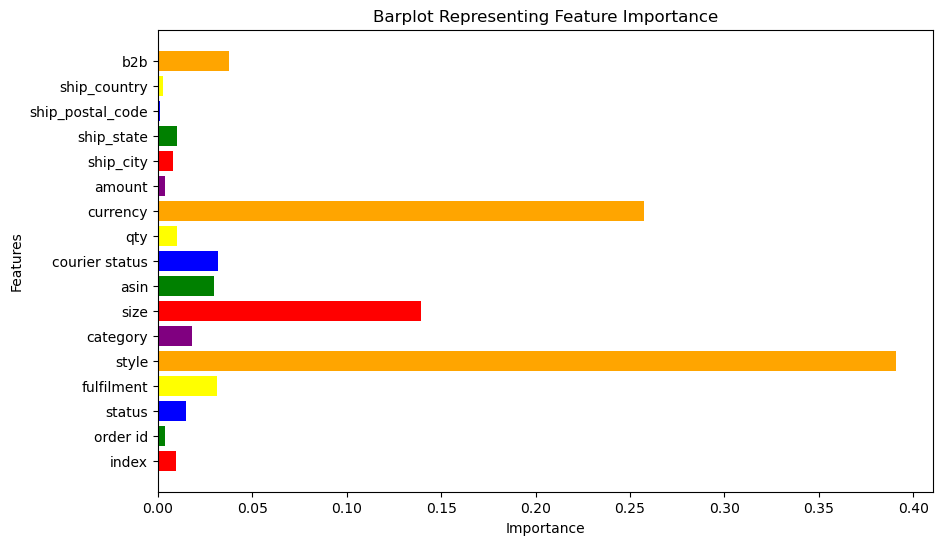

In [21]:
feature_names = ['index', 'order id', 'status', 'fulfilment', 'style', 'category',
       'size', 'asin', 'courier status', 'qty', 'currency', 'amount',
       'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'b2b']  # Örnek özellikler

importance_values = xgb.feature_importances_  # xgb.feature_importances_ kullanımına göre gerçek değerlerin alınması gerekiyor

imp_feature = pd.DataFrame({'Feature': feature_names, 'Importance': importance_values})

# Görselleştirme işlemi
plt.figure(figsize=(10, 6))
plt.title("Barplot Representing Feature Importance")# Özellik Önemi
plt.xlabel("Importance")#Önem Seviyesi
plt.ylabel("Features")#Özellikler
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=['red', 'green', 'blue', 'yellow', 'orange', 'purple'])
plt.show()

In [17]:
print(len(feature_names))  # feature_names'in uzunluğunu kontrol edin
print(len(importance_values))

18
17
